In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime,date
%matplotlib inline

In [2]:
# Loading in the data
df = pd.read_csv('googleplaystore.csv')

df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
# checking for nulls
df.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [4]:
# dropping duplicates and nulls, then reseting index

df.drop_duplicates(inplace=True)

df.dropna(inplace = True)

df.reset_index(drop = True, inplace = True)

In [5]:
# checking
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8886 entries, 0 to 8885
Data columns (total 13 columns):
App               8886 non-null object
Category          8886 non-null object
Rating            8886 non-null float64
Reviews           8886 non-null object
Size              8886 non-null object
Installs          8886 non-null object
Type              8886 non-null object
Price             8886 non-null object
Content Rating    8886 non-null object
Genres            8886 non-null object
Last Updated      8886 non-null object
Current Ver       8886 non-null object
Android Ver       8886 non-null object
dtypes: float64(1), object(12)
memory usage: 902.6+ KB


In [6]:
# REVIEWS
# going down the list, changing reviews to numeric values
df['Reviews'] = pd.to_numeric(df['Reviews'])

In [7]:
# SIZE

# replaces 'Varies with device' with null values
df['Size'].replace('Varies with device', np.nan, inplace=True)

# convert all size to mb, 1000kb = 1mb for simplicity

# replacing 'M' with a blank
df['Size'] = df['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)
# replacing ',' with a blank
df['Size'] = df['Size'].apply(lambda x: str(x).replace(',', '') if 'M' in str(x) else x)
# replacing 'k' with a blank
df['Size'] = df['Size'].apply(lambda x: float(str(x).replace('k', '')) / 1000 if 'k' in str(x) else x)
# replacing '+' with a blank
df['Size'] = df['Size'].apply(lambda x: float(str(x).replace('+',''))/1000 if '+' in str(x) else x)
# converting all in df['Size'] to datatype float
df['Size'] = df['Size'].astype(float)

In [8]:
# INSTALLS
# installs are of the form 100,000+
# so replacing '+' and ',' with blanks
df['Installs'] = df['Installs'].apply(lambda x: str(x).replace('+', '') if '+' in str(x) else x)
df['Installs'] = df['Installs'].apply(lambda x: str(x).replace(',', '') if ',' in str(x) else x)
# converting df['Installs'] to datatype float
df['Installs'] = df['Installs'].astype(float)

In [9]:
# prices are in the form $xx
# replacing '$' with blanks
df['Price'] = df['Price'].apply(lambda x: str(x).replace('$', '') if '$' in str(x) else x)

df['Price'] = df['Price'].astype(float)

In [10]:
#dropping the unrated content rating, since theres only one
df = df[df['Content Rating'] != 'Unrated']

In [11]:
# DATE
# converting to datetime object
dates = pd.to_datetime(df['Last Updated'])
# we'll use the latest date to calculate the number of days since the app was updated
# e.g date.max date - date
# creating a new column 'Days since last update'

df['Days since last update'] = dates.apply(lambda x: (dates.max().date() - datetime.date(x)).days)

df.drop('Last Updated', axis=1, inplace=True)

In [12]:
# Pri Genres, this is used to fill in the null values for 'Size'
df['Pri Genres'] = df['Genres'].apply(lambda x: str(x).split(';')[0])

# replacing the odd one out after checks
df['Pri Genres'] = df['Pri Genres'].replace('Music & Audio', 'Music')

In [13]:
df['Size'].fillna(df.groupby('Pri Genres')['Size'].transform('mean'),inplace = True)

In [14]:
df.head(1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Days since last update,Pri Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000.0,Free,0.0,Everyone,Art & Design,1.0.0,4.0.3 and up,213,Art & Design


Plots and more

In [15]:
# removing app where prices are $100 or more
df = df[df['Price'] < 100]

In [16]:
# dropping columns that we would not use
df.drop(['App', 'Current Ver', 'Android Ver', 'Genres', 'Pri Genres',], axis = 1, inplace = True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8870 entries, 0 to 8885
Data columns (total 9 columns):
Category                  8870 non-null object
Rating                    8870 non-null float64
Reviews                   8870 non-null int64
Size                      8870 non-null float64
Installs                  8870 non-null float64
Type                      8870 non-null object
Price                     8870 non-null float64
Content Rating            8870 non-null object
Days since last update    8870 non-null int64
dtypes: float64(4), int64(2), object(3)
memory usage: 693.0+ KB


In [18]:
df.head(1)

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Days since last update
0,ART_AND_DESIGN,4.1,159,19.0,10000.0,Free,0.0,Everyone,213


Text(1, 0.15, 'Median = 4.3')

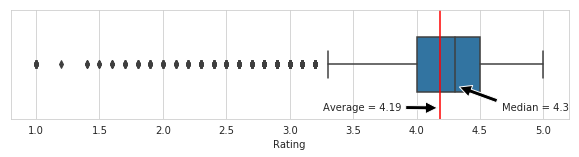

In [19]:
# boxplot of ratings
plt.figure(figsize = (10,2))
sns.set_style("whitegrid")
sns.boxplot(df['Rating'] , width = 0.5)
plt.axvline(x = df['Rating'].mean(), ymin=0, ymax=1, color= 'r', label = 'average')

plt.annotate('Average = {:.2f}'.format(df['Rating'].mean()),
            xy=(4.18, 0.4), xycoords='data',
            xytext=(0.7, 0.15), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')

plt.annotate('Median = {}'.format(df['Rating'].median()),
            xy=(4.32, 0.2), xycoords='data',
            xytext=(1, 0.15), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]), <a list of 6 Text yticklabel objects>)

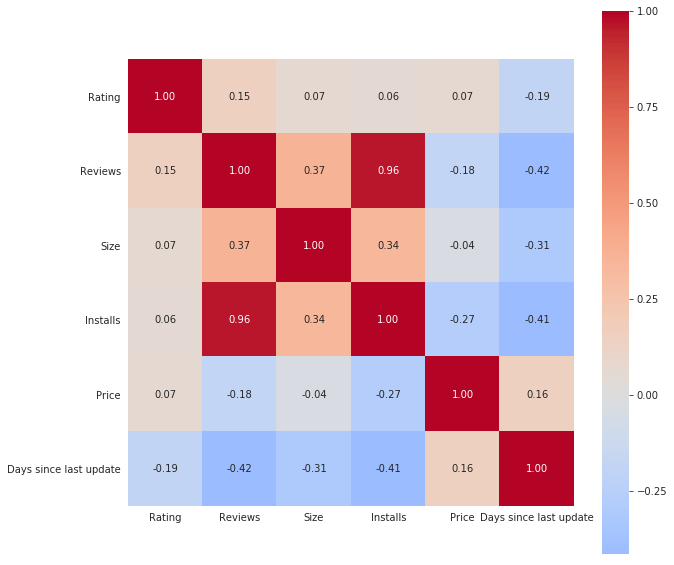

In [20]:
# heatmap of data

plt.figure(figsize = (10,10))

sns.heatmap(df.corr(method = 'spearman'), annot = True, fmt = '.2f', square = True, center = 0, cmap = 'coolwarm')

plt.yticks(rotation=0)

/Users/constructdigital/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


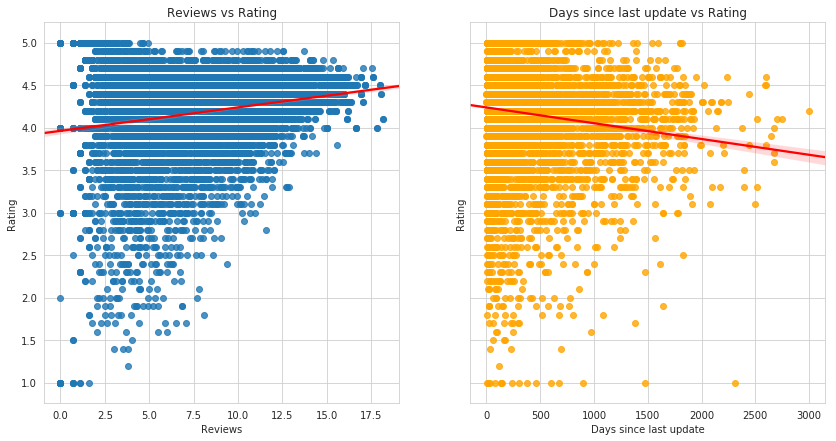

In [21]:
fig, (left, right) = plt.subplots(ncols=2, figsize=(14, 7), sharey = True)

left.set_title('Reviews vs Rating')
sns.regplot(np.log(df['Reviews']), df['Rating'] , ax = left, line_kws = {'color': 'red'})

right.set_title('Days since last update vs Rating')
sns.regplot(df['Days since last update'],df['Rating'], color = 'orange', ax = right, line_kws = {'color': 'red'})



In [22]:
# changing 'Type' column to numbers, 'Free' to 0, everything ele to 1
def type_to_num(types):
    if types == 'Free':
        return 0
    else:
        return 1

df['Type'] = df['Type'].apply(type_to_num)
    

In [23]:
# Changing 'Content Rating' column to numbers
ContRatings = df['Content Rating'].unique()
RatingDict = {}
for i in range(len(ContRatings)):
    RatingDict[ContRatings[i]] = i
df['Content Rating'] = df['Content Rating'].map(RatingDict).astype(int)


In [24]:
# getting dummy variables for 'Category' column
df2 = pd.get_dummies(df,columns = ['Category'],  drop_first = True)

In [25]:
df2.head()

,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Days since last update,Category_AUTO_AND_VEHICLES,Category_BEAUTY,...,Category_PERSONALIZATION,Category_PHOTOGRAPHY,Category_PRODUCTIVITY,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER
0,4.1,159,19.0,10000.0,0,0.0,0,213,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.9,967,14.0,500000.0,0,0.0,0,205,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.7,87510,8.7,5000000.0,0,0.0,0,7,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4.5,215644,25.0,50000000.0,0,0.0,1,61,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.3,967,2.8,100000.0,0,0.0,0,49,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
import warnings
warnings.filterwarnings("ignore")

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import train_test_split

X = df2.drop('Rating', axis = 1)
y = df2['Rating']

# Use 70% of the data to train the model, and test model accuracy with 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

lrmodel = LinearRegression()

lrmodel.fit(X_train, y_train)

rfrmodel = RandomForestRegressor(random_state=0)

rfrmodel.fit(X_train, y_train)

y_pred_lr = lrmodel.predict(X_test)

y_pred_rfr = rfrmodel.predict(X_test)


print('LR MAE: ' ,metrics.mean_absolute_error(y_test,y_pred_lr))

print('RFR MAE: ' ,metrics.mean_absolute_error(y_test,y_pred_rfr))

LR MAE:  0.35047261070567115
RFR MAE:  0.32646974821495683
